In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact
import networkx as nx
import pandas as pd

mpl.rcParams['figure.figsize'] = [6.0, 6.0]®

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

# Warm up

<img src="img/mvc-s1.1.qr.png" style="float:right" width="300px" />



Welcome to APMA E2000

# Multivariable Calculus
 
Drew C Youngren

<code>dcy2@columbia.edu</code>


Welcome to APMA E2000

# Multivariable Calculus for Engineers and Applied Scientists

Drew C Youngren

<code>dcy2@columbia.edu</code>

Welcome to APMA E2000

<img src="img/tmp.gif" width="50%" style="float:right" />

# MVC

Drew C Youngren

<code>dcy2@columbia.edu</code>

## Logistics

  - [Schedule](https://docs.google.com/spreadsheets/d/1Fe4STW3XDvxA5-CIXK_XPyERFoAkY028wcwaapg4Z_o/edit?usp=sharing)
  - Detailed syllabus on [Courseworks/Canvas](https://courseworks2.columbia.edu)
  - Assessment
    - Homework (weekly, usually due Tues a.m.)
    - Quizzes (weekly, in recitation)
    - Exams (two, in-class, see schedule)
    - Final Exam (set by registrar)
  - Office Hours (*projected)
    - Youngren: M 1100–1250 Mudd 214, R 1010–1100 Eng Terr 287
    - TAs: Jessie, Hwi, Kuang
  - Help Hours
    - CAs: MR 1900–2100, S 1500–1700 TBD

## Homework 0

Due Friday, 12 pm (noon). Make sure you can access all digital platforms.

  - Courseworks - Assignments/grades/announcements
  - Piazza - Discussion/questions
  - Gradescope - submit homework

## Recitation

**Does** meet this week. No quiz. Bring a laptop if possible. 



# What is calculus?

In [4]:
from wordcloud import WordCloud
import re

pat = re.compile(r"[^\w']+")   
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRwge0i83wewA-X4G6ki5zhdPfcDRyHBbwH7hAA5XeWJTfL_IaZAkfINu4ZCESyRrbqRkk_SndUZE3H/pub?gid=1016261283&single=true&output=csv"
df = pd.read_csv(url)
wds = df["Calculus is..."].tolist()
wds = [item.lower() for w in wds for item in pat.split(w)]
wds = [w for w in wds if w not in ["the","a","with","among","an","of","in","to","for","is","that","it","was","you"]]
wc = WordCloud(background_color="#EEEEFF00",width = 800,height=600).generate(' '.join(wds))

In [ ]:
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off");

In case that didn't work, here's last semester's:

![Calculus is...wordcloud](img/calculus-worcloud.png)

  # What is Multivariable Calculus?
  
  In the first two semesters of calculus, the object of study are functions from the real numbers to the real numbers.
  
  $$f: \RR \to \RR$$

In multivariable calculus, we'll expand this study in three ways:

  - Vector-values functions (curves) $$f:\RR \to \RR^n$$

  - Functions of several variables (scalar fields) $$f:\RR^n \to \RR$$

  - Vector fields $$f:\RR^n \to \RR^n$$

## What is $\RR^n$?

$$ \RR = \RR^1 = \text{ the real numbers}$$

$$\RR^2 = \{ (x,y): x,y \in \RR \} = \text{ the Cartesian plane}$$

$$\RR^3 = \{ (x,y,z): x,y,z \in \RR \} = \text{ 3-space}$$

$$\dots$$ $$ \RR^n = n\text{-space}$$

## Loci

A set of points in space determined by some condition is called a **locus**. These are often solution sets to equations. Many examples involve the distance formula.

### Examples

  1. $x + y = 3$

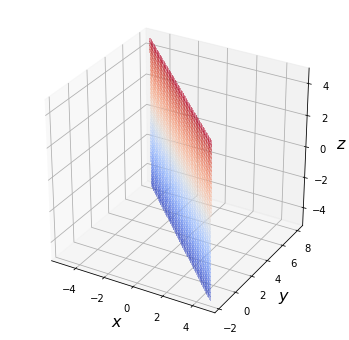

In [9]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = -3*X

ax.set_xlabel("$x$",fontsize=16)
ax.set_ylabel("$y$",fontsize=16)
ax.set_zlabel("$z$",fontsize=16)


# Plot the surface.
surf = ax.plot_surface(X, 3-X, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=.4)

## Distance

The formula for the distance between two points in $\RR^n$ is trivial if you just remember the Pythagorean Theorem.

$$d = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

  2. $x^2 + y^2 +z^2 = 1$

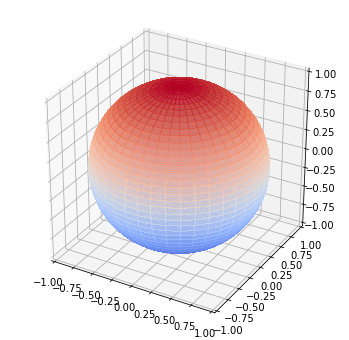

In [19]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(0, 2*np.pi,80)
y = np.linspace(0, np.pi,40)
x, y = np.meshgrid(x, y)
X = np.sin(y)*np.cos(x)
Y = np.sin(y)*np.sin(x)
Z = np.cos(y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.2, antialiased=False,alpha=.8)
for dim in 'xyz':
    getattr(ax, f'set_{dim}lim')([-1,1])


# Vectors

A **vector** in $\RR^n$ is a directed line segment $\overrightarrow{AB}$ between two points. 

Two vectors are considered the same if they have the same *magnitude* (length) and *direction*.

In [20]:
def plot_vector(v,base=(0,0),**kwargs):
    """Plots a vector `v` with tail at the point `base` (defaults to origin)."""
    plt.arrow(base[0],base[1],v[0],v[1],length_includes_head=True,head_width=.2,**kwargs);

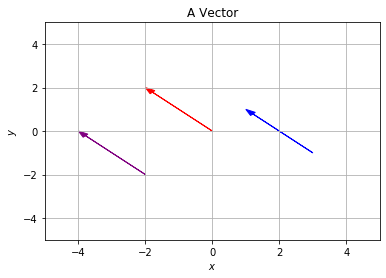

In [23]:
v = np.array([-2,2])
w = np.array([3,-4])

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("A Vector");

plot_vector(v,color='r')
plot_vector(v,base=(3,-1),color='b')
plot_vector(v,base=(-2,-2),color='purple')
plt.grid(True);

## Notation

We specify a vector by the displacement in each component. E.g., $$\vec v = \langle 3,1 \rangle = \bv{3 \\ 1}.$$

### Analogy

$(3,21)$ is a point. $\vec v = \langle 3,21\rangle$ is a vector. 

"21st St & 3rd Ave" is a location. "21 blocks north and 3 blocks west" is a displacement. 

# Vector Operations

The most important aspect of vectors is what you can do with/to them. In a sense their defining feature is that they can be **scaled** and **added together**.

Let $\vec v = \langle v_1, v_2, v_3 \rangle$.

### Magnitude

The **magnitude** of a vector $\vec v$ is a (nonnegative) scalar $|\vec v|$ (also written $\| \vec v \|$). 

$$|\vec v| = \sqrt{v_1^2 +v_2^2 + v_3^2}$$

## Scalar multiplication

Let $c$ be a scalar. $$c\vec v = \langle c v_1, c v_2, c v_3\rangle$$

In [51]:
@interact
def _(s=(-1,3.)):
    plt.xlim([-6,6])
    plt.ylim([-6,6])
    plt.grid(True)
    plt.arrow(0,0,3,1,color='b',head_width=.2,length_includes_head=True)
    plt.arrow(0,0,s*3,s,color="gray",alpha=.6,head_width=.2,length_includes_head=True)

interactive(children=(FloatSlider(value=1.0, description='s', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

#### Short exercise 

Complete the identity $$|c\vec v| = $$

## Vector addition

Let $\vec w = \langle w_1,w_2,w_3 \rangle$. $$\vec v + \vec w = \langle v_1 +w_1, v_2+w_2, v_3+w_3 \rangle$$

In [50]:
@interact
def _(w1=(-2,2.),w2=(-2,2.)):
    v = np.array((3,1))
    w = np.array((w1,w2))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.grid(True)
    plt.arrow(0,0,3,1,color='b',head_width=.2,length_includes_head=True)
    plt.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True)
    plt.arrow(v[0],v[1],(w)[0],(w)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
    plt.arrow(w[0],w[1],(v)[0],(v)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
    plt.arrow(0,0,(v+w)[0],(v+w)[1],color="purple",alpha=1,head_width=.2,length_includes_head=True)

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

# Linear combinations

A **linear combination** of vectors $\vec v$ and $\vec w$ is a vector $$a\vec v + b \vec w$$where $a$ and $b$ are arbitrary scalars. 

#### Example - important

$$\vec v - \vec w = \vec v + (-1) \vec w$$ is the **difference** between two vectors.

Plot the vectors $\vec v = \langle 3,1 \rangle$, $\vec w = \langle -2,2\rangle$, and the difference $\vec v - \vec w$.

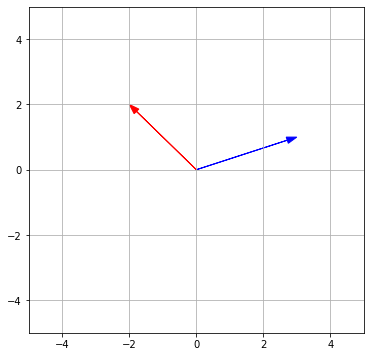

In [49]:
v = np.array([3,1])
w = np.array([-2,2])
plt.xlim([-5,5])
plt.ylim([-5,5])
plot_vector(v,color='b')
plot_vector(w,color='r')
plt.grid(True)

#### Exercise
 
  1. Plot the the following linear combinations of the vectors $\vec v = \langle 3,1 \rangle$ and $\vec w = \langle -2,2\rangle$:
      
    1. $\vec v+\vec w$
    2. $\frac{\vec v + \vec w}{2}$
    3. $2\vec w - \vec v$

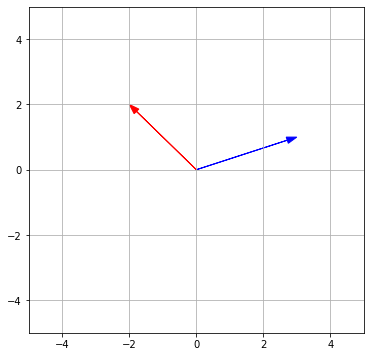

In [49]:
v = np.array([3,1])
w = np.array([-2,2])
plt.xlim([-5,5])
plt.ylim([-5,5])
plot_vector(v,color='b')
plot_vector(w,color='r')
plt.grid(True)

  2. (extra) What linear combination is this? $$ .15 \vec h + .2\vec q + .35 \vec m + .3 \vec f$$
  

# Dot product

We do not simply _multiply_ vectors, per se, but there are special products we take. 

The **dot product** (or scalar product or inner product) between two vectors $\vec v = \langle v_1, \dots,v_n\rangle$ and $\vec w = \langle w_1, \dots,w_n\rangle$ is given by

$$\vec v\cdot \vec w = \sum_{i=1}^n v_i w_i $$

In [56]:
@interact
def _(w1=(-2,2.,.5),w2=(-2,2.,.5)):
    v = np.array((3,1))
    w = np.array((w1,w2))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.grid(True)
    plt.arrow(0,0,3,1,color='b',head_width=.2,length_includes_head=True)
    plt.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True)
#     plt.arrow(v[0],v[1],(w)[0],(w)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
#     plt.arrow(w[0],w[1],(v)[0],(v)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
#     plt.arrow(0,0,(v+w)[0],(v+w)[1],color="purple",alpha=1,head_width=.2,length_includes_head=True)
    plt.title(f"$\\vec v \\cdot \\vec w = {np.dot(v,w)}$")

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0, step=0.5), FloatSlider(value…

# Properties of the dot product

The dot product is:

  - commutative $$\vec v \cdot \vec w = \vec w \cdot \vec v$$

  - bilinear $$(c\vec v + d\vec w )\cdot \vec u = c(\vec v\cdot \vec u) + d(\vec w\cdot \vec u)$$

It can be used to define the magnitude. $$|\vec v|^2 = \vec v \cdot \vec v$$

There is a special vector $\vec 0 = \langle 0,0,\dots,0\rangle$, and for all $\vec v$, $$\vec v\cdot \vec 0 = 0$$

# The Most Important Property

Observe what happens with the angles. 

In [63]:
@interact
def _(w1=(-2,2.,.5),w2=(-2,2.,.5),th=(-np.pi,np.pi)):
    A = np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
    v = A.dot(np.array((3,1)))
    w = A.dot(np.array((w1,w2)))
#     print(A*v)
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.grid(True)
    plt.arrow(0,0,v[0],v[1],color='b',head_width=.2,length_includes_head=True)
    plt.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True)
#     plt.arrow(v[0],v[1],(w)[0],(w)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
#     plt.arrow(w[0],w[1],(v)[0],(v)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
#     plt.arrow(0,0,(v+w)[0],(v+w)[1],color="purple",alpha=1,head_width=.2,length_includes_head=True)
    plt.title(f"$\\vec v \\cdot \\vec w = {np.dot(v,w)}$")

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0, step=0.5), FloatSlider(value…

$$ \vec v \cdot \vec w = |\vec v ||\vec w| \cos \theta$$ where $\theta$ is the angle between them.

### Exercise

Show that for all vectors $\vec v$ and $\vec w$,

$$\vec v \cdot \vec w \leq \frac{|\vec v|^2 + |\vec w|^2}{2}.$$